In [1]:
#%%capture

import pandas as pd
import numpy as np
import scipy as sp
import plotly
import folium
import os

import plotly.io as pio
pio.renderers.default='notebook'

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import ipywidgets
from IPython.core.display import HTML
from IPython.display import display, clear_output
import datetime
from io import StringIO

import trianer

plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Meteo

Prévisions météo pour: 47.91,7.18

      \   /     Ensoleillé
       .-.      +27(26) °C     
    ― (   ) ―   ↙ 11           
       `-’      10             
      /   \     0.0            
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤mar. 12 juil.├───────────────────────┬──────────────────────────────┐
│             Matin            │          Après-midi   └──────┬──────┘       Soir            │             Nuit             │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│     \   /     Ensoleillé     │     \   /     Ensoleillé     │     \   /     Ensoleillé     │     \   /     Ensoleillé     │
│      .-.      21 °C          │      .-.      25 °C          │      .-.      +24(25) °C     │      .-.      17 °C          │
│   ― (   ) ―   ↙ 4-5          │   ― (   ) ―   ↙ 9-10 

'La temperature attendue est de 26 °C'

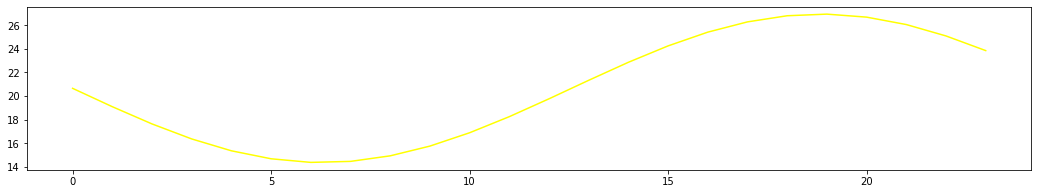

In [5]:
trianer.Triathlon(epreuve="Elsassman", longueur="L").show_weather_forecasts()

# Guillaume

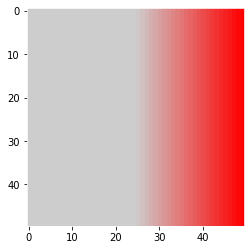

In [65]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

colors = ["#cdcdcd", "#cdcdcd", (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list( "Custom", colors, N=50)
mat = np.indices((50, 50))[1]
plt.imshow(mat, cmap=cm)
plt.show()

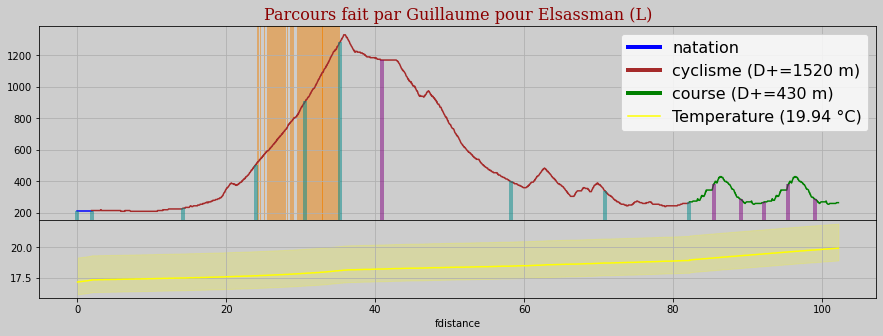

In [20]:
guillaume = trianer.Triathlon(epreuve="Elsassman", longueur="L", temperature=[17, 21], # Deauville Elsassman
                              athlete=trianer.Athlete(name="Guillaume", poids=80, natation="2min15s/100m", cyclisme="25.0km/h", course="6min0s/km", transitions="10min", sudation="faible"))
#display(guillaume.show_gpx_track())
guillaume.show_race_details()
#guillaume.show_race_details(xaxis = "itime")
#guillaume.show_nutrition()
#guillaume.show_roadmap()

 # Sylvia

438


Depuis depart,discipline,distance,Consommation,Boisson,Alimentation,Temps de passage,Bilan hydrique,Bilan kcalorique,Durée totale,Temperature
0.000000,natation,0 km,transition,100 ml,0 kcal,10:30,100 ml,0 kcal,00:00,21 °C
24.000000,transition 1,1 km,Isotonic+pate de fruits + compote,300 ml,200 kcal,10:54,-192 ml,179 kcal,00:24,21 °C
55.000000,cyclisme,11 km,30 min,300 ml,100 kcal,11:24,-855 ml,-62 kcal,00:54,22 °C
85.000000,cyclisme,22 km,30 min,300 ml,100 kcal,11:54,-1515 ml,-302 kcal,01:24,22 °C
95.000000,transition 2,24 km,Isotonic+pate de fruits + gel,300 ml,200 kcal,12:04,-1676 ml,41 kcal,01:34,22 °C
126.000000,course,5 km,nan,nan ml,nan kcal,12:35,-2678 ml,-579 kcal,02:05,23 °C


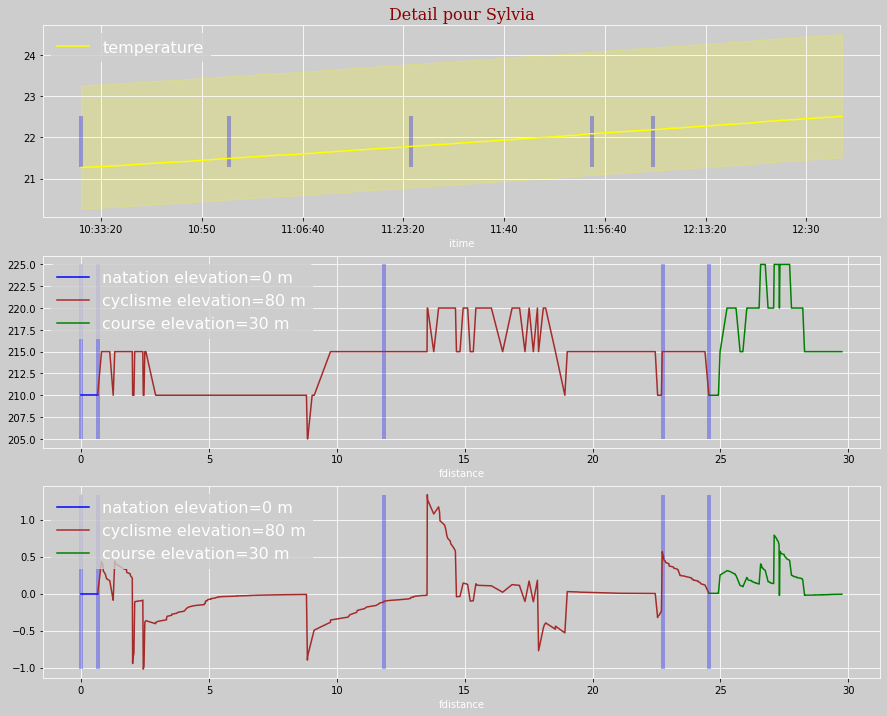

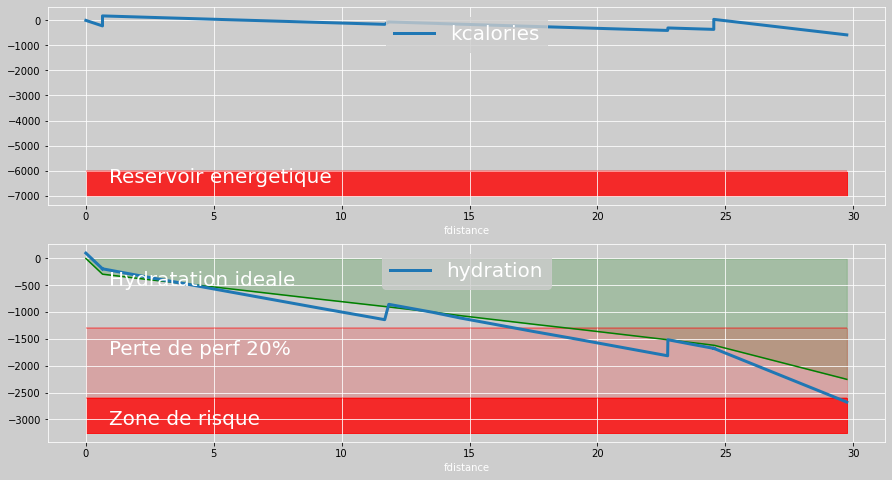

In [25]:
sylvia = triaainer.Triathlon(epreuve="Elsassman", longueur="S", temperature=[20, 25], 
                             athlete=triaainer.Athlete(name="Sylvia", poids=65, natation="3min0s/100m", cyclisme="22.0km/h", course="6min0s/km", transitions="10min", sudation="intense"))
display(sylvia.show_gpx_track())
sylvia.show_race_details()
sylvia.show_nutrition()
sylvia.show_roadmap()

# Cyrille

1463


Depuis depart,discipline,distance,Consommation,Boisson,Alimentation,Temps de passage,Bilan hydrique,Bilan kcalorique,Durée totale,Temperature
0.000000,natation,0 km,transition,100 ml,0 kcal,11:15,100 ml,0 kcal,00:00,18 °C
35.000000,transition 1,2 km,Isotonic+pate de fruits + compote,300 ml,200 kcal,11:50,-351 ml,-9 kcal,00:35,19 °C
65.000000,cyclisme,14 km,30 min,300 ml,100 kcal,12:20,-703 ml,-584 kcal,01:05,19 °C
85.000000,cyclisme,21 km,org: remplir eau,300 ml,100 kcal,12:40,-835 ml,-932 kcal,01:25,19 °C
115.000000,cyclisme,36 km,30 min,300 ml,100 kcal,13:10,-1189 ml,-1508 kcal,01:55,19 °C
129.000000,transition 2,40 km,Isotonic+pate de fruits + gel,300 ml,200 kcal,13:23,-1377 ml,-1304 kcal,02:08,19 °C
149.000000,course,3 km,org: eau + fruit,300 ml,100 kcal,13:43,-1522 ml,-1676 kcal,02:28,20 °C
171.000000,course,7 km,org: eau + fruit,300 ml,100 kcal,14:05,-1731 ml,-2096 kcal,02:50,20 °C
189.000000,course,10 km,nan,nan ml,nan kcal,14:24,-2160 ml,-2533 kcal,03:09,20 °C


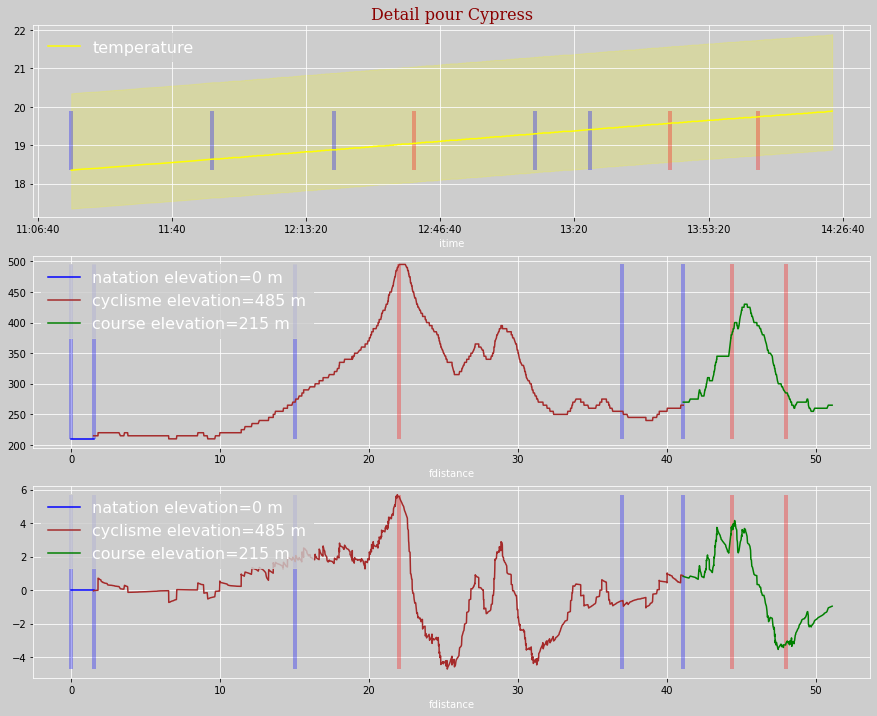

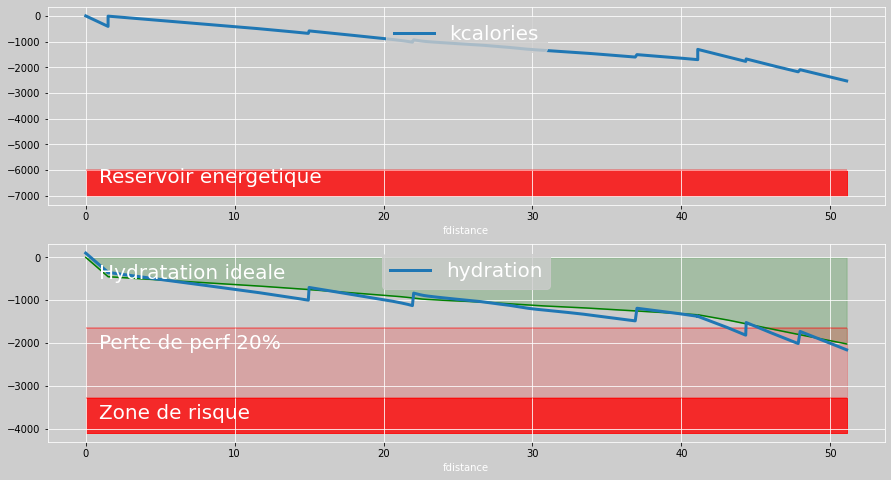

In [28]:
cyrille = triaainer.Triathlon(epreuve="Elsassman", longueur="M", temperature=[17, 21], # Deauville Elsassman 
                              athlete=triaainer.Athlete(name="Cypress", poids=82, natation="2min15s/100m", cyclisme="28.0km/h", course="6min0s/km", transitions="10min"))
display(cyrille.show_gpx_track())
cyrille.show_race_details()
cyrille.show_nutrition()
cyrille.show_roadmap()

# Vanina

438


Depuis depart,discipline,distance,Consommation,Boisson,Alimentation,Temps de passage,Bilan hydrique,Bilan kcalorique,Durée totale,Temperature
0.000000,natation,0 km,transition,100 ml,0 kcal,10:30,100 ml,0 kcal,00:00,21 °C
25.000000,transition 1,1 km,Isotonic+pate de fruits + compote,300 ml,200 kcal,10:54,-193 ml,191 kcal,00:24,21 °C
55.000000,cyclisme,11 km,30 min,300 ml,100 kcal,11:24,-695 ml,-30 kcal,00:54,22 °C
85.000000,cyclisme,22 km,30 min,300 ml,100 kcal,11:54,-1195 ml,-250 kcal,01:24,22 °C
95.000000,transition 2,24 km,Isotonic+pate de fruits + gel,300 ml,200 kcal,12:04,-1329 ml,97 kcal,01:34,22 °C
121.000000,course,5 km,nan,nan ml,nan kcal,12:30,-2025 ml,-390 kcal,02:00,22 °C


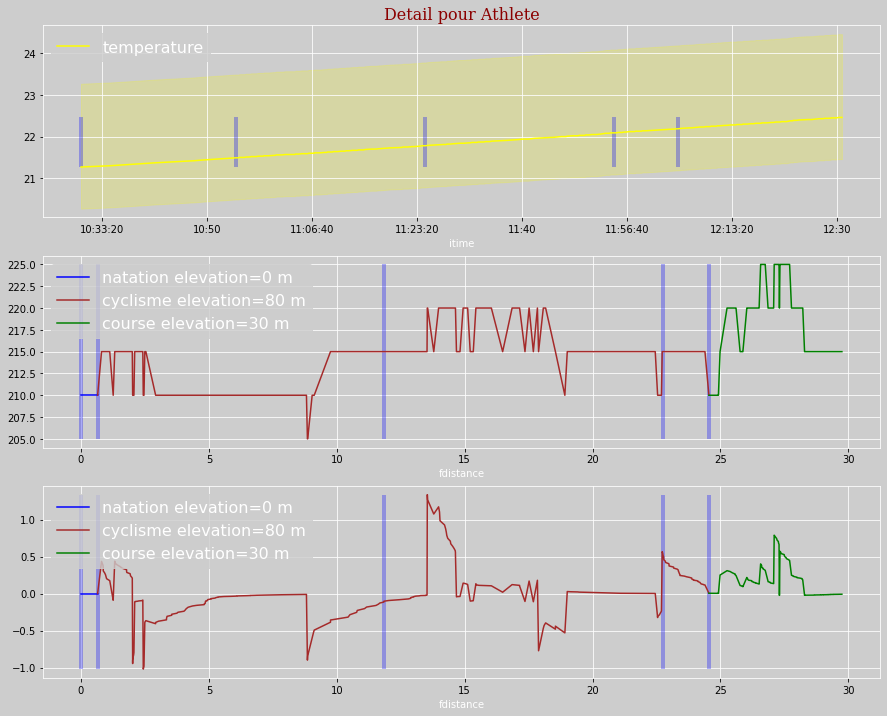

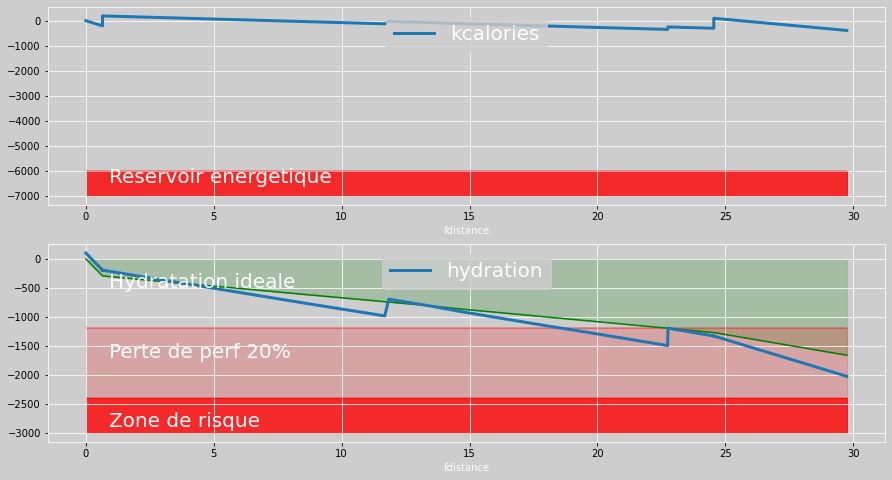

In [29]:
vanina = triaainer.Triathlon(epreuve="Elsassman", longueur="S", temperature=[20, 25], 
                             athlete=triaainer.Athlete(poids=60, natation="3min30s/100m", cyclisme="22.0km/h", course="5min30s/km", transitions="10min"))
display(vanina.show_gpx_track())
vanina.show_race_details()
vanina.show_nutrition()
vanina.show_roadmap()

# R&D

In [7]:
triathlon = triaainer.Triathlon(epreuve="course", longueur="20")
athlete = triaainer.Athlete(poids=80, natation="2min10s/100m", cyclisme="30.0km/h", course="5min30s/km")

# Get expected performance
aperf = triathlon.simulate_race(athlete)#, temperature=15)

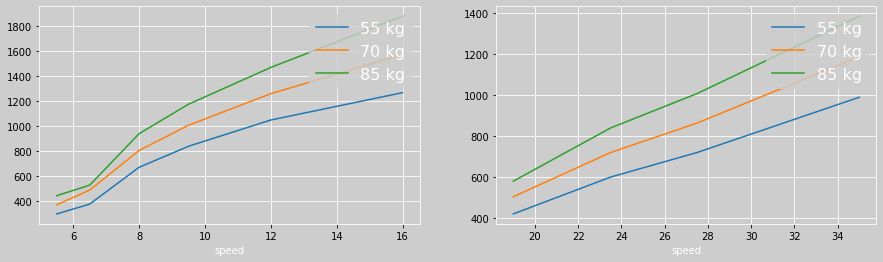

In [8]:
triaainer.show_kcalories()

In [9]:
import plotly.express as px
fig = px.scatter_geo(guillaume.gpx, lat='latitude', lon='longitude', hover_name="altitude")
fig.update_layout(title='Gpx track', title_x=0.5)
fig.show()

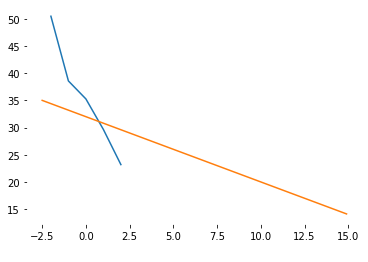

In [10]:
# Impact of 
import glob

fdata = triaainer.enrich_data(pd.concat([triaainer.get_data(filename=a) for a in glob.glob("pace_data/*") if not "Course" in a]))

fdata["speed"] = 3600 * (fdata["distance"].diff().ewm(10).mean() / fdata.dtime.diff().dt.seconds).fillna(0.)

cdata = fdata[fdata["speed"] > 10]
cdata["hr"] = cdata["hr"].astype(float)#.hist()

cdata["sslope"] = pd.Series(cdata["slope"]).round()

cdata.groupby("sslope").mean()["speed"].plot()
x = np.arange(-2.5, 15, 0.1)
y = 32-x*1.2
plt.plot(x, y)


<AxesSubplot:>

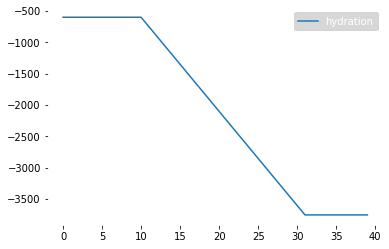

In [11]:
temp = np.arange(0, 40)
hydr = pd.Series(-np.clip(temp * 100 - 600, 400, 2500), index=temp).to_frame(name="hydration")
hydr*=1.5
sudation=5

hydr.plot()


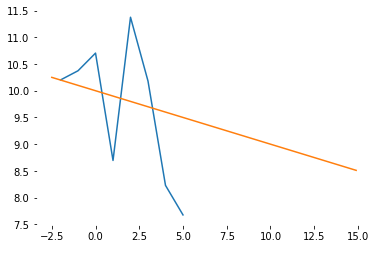

In [12]:
import glob


fdata = triaainer.enrich_data(pd.concat([triaainer.get_data(filename=a) for a in glob.glob("pace_data/*") if "Course" in a]))

fdata["speed"] = 3600 * (fdata["distance"].diff() / fdata.dtime.diff().dt.seconds).ewm(10).mean().fillna(0.)

cdata = fdata[fdata["speed"] > 7]
cdata["hr"] = cdata["hr"].astype(float)#.hist()

cdata["sslope"] = pd.Series(cdata["slope"]).round()

cdata.groupby("sslope").mean()["speed"].plot()
x = np.arange(-2.5, 15, 0.1)
y = 10-x*0.1
plt.plot(x, y)


In [13]:
! ls pace_data

 Course_pied_dans_l_apr_s_midi.gpx   Course_pied_matinale.gpx
'Course_pied_le_matin (1).gpx'	     Sortie_v_lo_le_midi.gpx
 Course_pied_le_matin.gpx	     V_lo_du_matin.gpx


In [14]:
! ls races

Deauville_L_course.gpx	  Deauville_XL_cyclisme.gpx  Elsassman_M_natation.gpx
Deauville_L_cyclisme.gpx  Elsassman_L_cyclisme.gpx   Elsassman_S_course.gpx
Deauville_M_course.gpx	  Elsassman_L_natation.gpx   Elsassman_S_cyclisme.gpx
Deauville_M_cyclisme.gpx  Elsassman_M_course.gpx     Elsassman_S_natation.gpx
Deauville_XL_course.gpx   Elsassman_M_cyclisme.gpx
